# Project: Advanced Data Modeling and Deployment

# Sentiment Analysis Using Various ML Classifiers and LSTM 

# Importing libraries <a id="1"></a>

In [ ]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('twitter_api.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [3]:
data = data.sample(frac=1)
data = data[:200000]

# Data Visualization <a id="3"></a>

Dataset details
target: the polarity of the tweet (0 = negative, 4 = positive)

* date : the date of the tweet 
* polarity : the polarity of the tweet (0 = negative 4 = positive)
* user : the user that tweeted 
* text : the text of the tweet 

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [5]:
data.tail(10)

,polarity,id,date,query,user,text
1271484,4,2000560770,Mon Jun 01 22:23:46 PDT 2009,NO_QUERY,jordanislikeBAM,Heyyy I'm sleeping in my own bed tonight
773796,0,2306243038,Tue Jun 23 22:01:02 PDT 2009,NO_QUERY,splendidsammm,BRUCE BOWEN IS LEAVING THE SPURS
1329344,4,2015652262,Wed Jun 03 05:12:08 PDT 2009,NO_QUERY,missviva2009,I'm still thinking about HOW amaziingly delici...
892138,4,1691089454,Sun May 03 17:04:09 PDT 2009,NO_QUERY,yosoyian,@markman641 idk Mark... Problably you need to ...
894782,4,1692412987,Sun May 03 19:56:36 PDT 2009,NO_QUERY,biggaboss,@ljphoto Thank you sweetie!
1407353,4,2055494951,Sat Jun 06 09:25:15 PDT 2009,NO_QUERY,maryssalopresti,waiting on the mail to come bc i gots a letter...
1540546,4,2180498661,Mon Jun 15 10:33:11 PDT 2009,NO_QUERY,NorbertWilli,Sittin' next to @maxotwig and preparing for tr...
844755,4,1564105749,Mon Apr 20 01:48:14 PDT 2009,NO_QUERY,ZamirHady,@miszdaia serious ada ujang siri tv? i want th...
877503,4,1685006254,Sat May 02 22:44:29 PDT 2009,NO_QUERY,mgmead,Trying to decide whether tweeting is worth my ...
257837,0,1985056004,Sun May 31 16:20:27 PDT 2009,NO_QUERY,LatexGirlsHD,@almtalkies my Macbook sounds like it has asth...


In [6]:
data['polarity'].unique()

array([0, 4])

In [7]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
178823,0,1966086989,Fri May 29 17:05:59 PDT 2009,NO_QUERY,jwalsh,@Peter5tewart yeah.. I left cause my pc can't ...
1246239,1,1995255611,Mon Jun 01 13:11:55 PDT 2009,NO_QUERY,RobertGirandola,@MiaChambers Hello Mia - how are you today??
1205925,1,1986666565,Sun May 31 19:09:15 PDT 2009,NO_QUERY,VANITY_ROCK,"Miley deserves this one, congrats @mileycyrus...."
283776,0,1992993694,Mon Jun 01 09:39:32 PDT 2009,NO_QUERY,Ellsea,Sad. Very pretty turquoise ballet pumps that f...
962446,1,1827357631,Sun May 17 10:32:29 PDT 2009,NO_QUERY,mojabunni,@quix http://twitpic.com/5dbay - OMG! I rememb...


In [8]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.499270,1.998881e+09
std,0.500001,1.937806e+08
min,0.000000,1.467811e+09
25%,0.000000,1.956995e+09
50%,0.000000,2.002093e+09
75%,1.000000,2.177104e+09
max,1.000000,2.329206e+09


In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99854
No. of negative tagged sentences is: 100146


In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

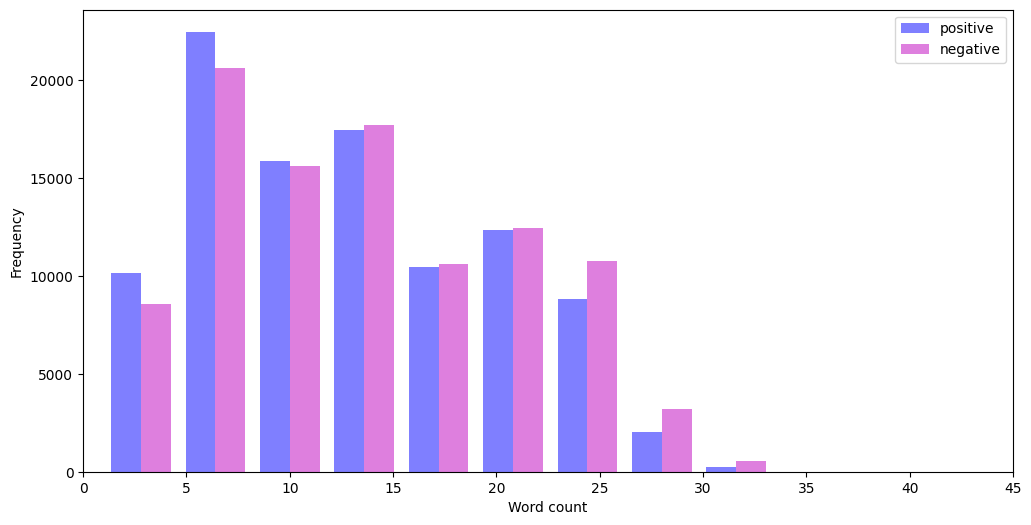

In [11]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['b','m'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 64898),
 ('and', 36813),
 ('you', 29552),
 ('for', 26692),
 ('have', 17947),
 ('that', 15938),
 ("i'm", 15869),
 ('but', 15556),
 ('just', 15554),
 ('with', 14190),
 ('was', 12829),
 ('not', 12826),
 ('this', 11206),
 ('get', 10179),
 ('good', 9788),
 ('are', 9667),
 ('like', 9399),
 ('all', 9320),
 ('out', 8477),
 ("it's", 8047)]

# Data Processing <a id="4"></a>

In [ ]:
# %matplotlib inline
# sns.countplot(data['polarity'])

In [14]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [15]:
data.drop('id', axis=1, inplace=True)

In [16]:
data.head(10)

,polarity,text
178823,0,@Peter5tewart yeah.. I left cause my pc can't ...
1246239,1,@MiaChambers Hello Mia - how are you today??
1205925,1,"Miley deserves this one, congrats @mileycyrus...."
283776,0,Sad. Very pretty turquoise ballet pumps that f...
962446,1,@quix http://twitpic.com/5dbay - OMG! I rememb...
1123355,1,i'm just so happy right at this exact moment
281207,0,@lynnbryn oh i know the feeling well - feel a ...
370798,0,I miss the beach already
140469,0,no electricity for 4 hrs
1258585,1,@lollipop49 im assuming your talking about the...


In [17]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [18]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [19]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'at', "aren't", 'shan', 'ain', 'where', "doesn't", 'but', 'hadn', 'isn', 'against', 'again', 'this', 'our', 'hers', 'their', 'more', 'wouldn', 'who', 'my', "shan't", "mightn't", 'own', 'didn', "i'm", 'weren', 'some', 'between', 'you', "they've", "we've", 'too', "i've", 'himself', 'over', 'me', 'an', 'ma', "hasn't", 'did', 'both', 'if', 'theirs', 'they', 'those', "he's", 'same', "shouldn't", 'very', 'am', 'most', 'because', 'doing', 'or', 'while', 'hasn', 'down', 'not', 'into', 'having', 'him', 'm', 'she', 'i', 'o', 'the', "you'd", 'why', "didn't", 'it', 'so', 'how', 'other', "they'd", 'from', 'of', 'these', 'your', 'shouldn', 'does', "couldn't", 'couldn', 'further', 'herself', 'such', "they're", "won't", 'were', "mustn't", 'be', 'being', 'is', 'itself', 'them', 'off', 'he', 'yourself', "needn't", 'will', 'as', 'what', 'just', 'all', 'should', "that'll", 'a', 'do', 'can', 'won', "don't", "i'd", 'which', 're', 'with', 'd', 'each', "it's", "she's", 'whom', 'yours', 'after', "we'll", 'hav

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. 

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [22]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [23]:
data.head(10)

,polarity,text,processed_tweets
178823,0,@Peter5tewart yeah.. I left cause my pc can't ...,yeah left cause pc cant run client anymore tho...
1246239,1,@MiaChambers Hello Mia - how are you today??,hello mia today
1205925,1,"Miley deserves this one, congrats @mileycyrus....",miley deserves one congrats leighton meester rock
283776,0,Sad. Very pretty turquoise ballet pumps that f...,sad pretty turquoise ballet pump fitted perfec...
962446,1,@quix http://twitpic.com/5dbay - OMG! I rememb...,omg remember one favoritesquite kooky
1123355,1,i'm just so happy right at this exact moment,im happy right exact moment
281207,0,@lynnbryn oh i know the feeling well - feel a ...,oh know feeling well feel bit like lol
370798,0,I miss the beach already,miss beach already
140469,0,no electricity for 4 hrs,electricity hr
1258585,1,@lollipop49 im assuming your talking about the...,im assuming talking jb chat


# Analyzing the data 

#### Now we're going to analyse the preprocessed data to get an understanding of it. 
#### We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

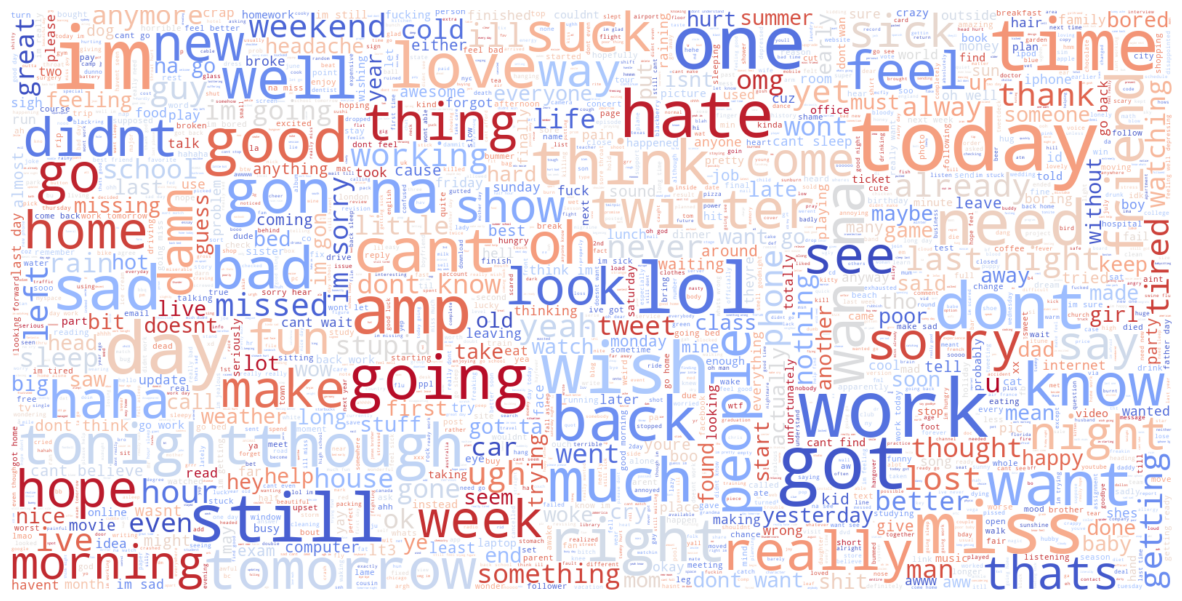

In [ ]:
# Create a figure with specified size
plt.figure(figsize=(15, 15))

# word cloud from tweets with polarity == 0 (neutral)
wc = WordCloud(
    max_words=2000,           # Maximum number of words to display
    width=1600,               # Width of the word cloud image
    height=800,              # Height of the word cloud image
    colormap='coolwarm',     # Custom colormap for visual appeal
    background_color='white', # Background color for the word cloud
    max_font_size=120,       # Maximum font size for the largest word
    random_state=42          # Set seed for reproducibility
).generate(" ".join(data[data.polarity == 0].processed_tweets))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

### Word-Cloud for Positive tweets.

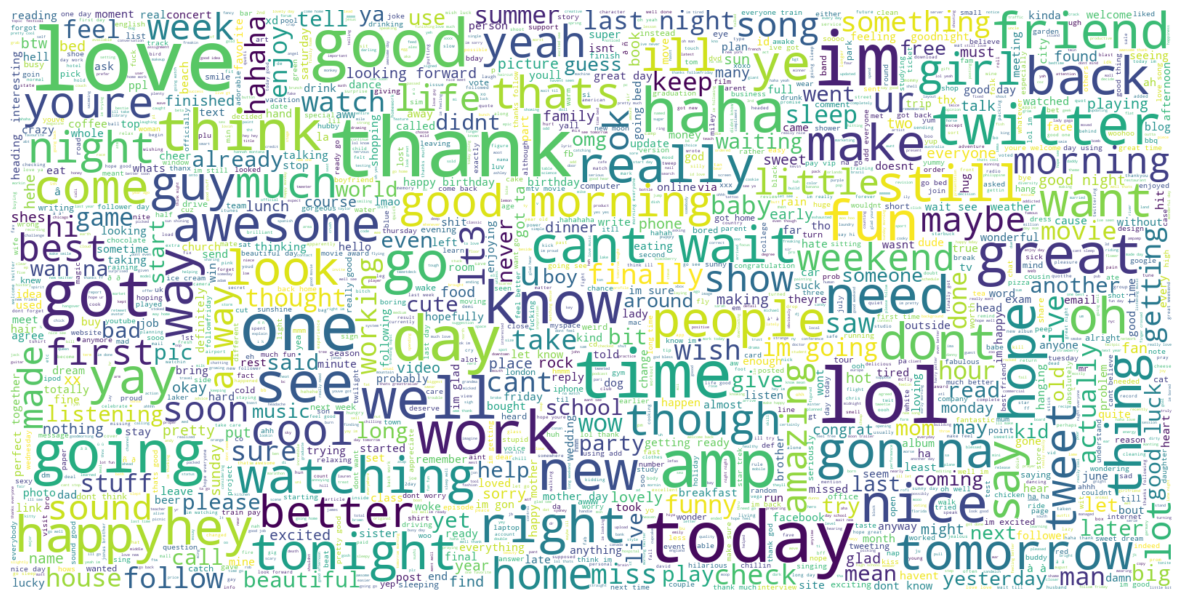

In [92]:
# Create a figure with a specified size
plt.figure(figsize=(15, 15))

# word cloud for tweets with polarity == 1 (positive)
wc = WordCloud(
    max_words=2000,           # Maximum number of words to display
    width=1600,               # Width of the word cloud image
    height=800,              # Height of the word cloud image
    colormap='viridis',      # Colormap for the word cloud 
    background_color='white', # Background color for the word cloud
    max_font_size=120,       # Maximum font size for the largest word
    random_state=42          # Set random state for reproducibility
).generate(" ".join(data[data.polarity == 1].processed_tweets))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [26]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [27]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [28]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')

Vector fitted.


In [29]:

#print('No. of feature_words: ', len(vector.get_feature_names()))
print('No. of feature_words: ', len(vector.get_feature_names_out()))


No. of feature_words:  101500


In [30]:
print(X.shape)
print(y.shape)

(200000, 101500)
(200000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=41)

In [32]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 101500)
y_train (160000,)

X_test (40000, 101500)
y_test (40000,)


# Model Building <a id="7"></a>

### Model evaluating function

In [34]:
def model_Evaluate(model):
    # Accuracy of model on training data
    acc_train = model.score(X_train, y_train)
    # Accuracy of model on test data
    acc_test = model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {:.2f}%'.format(acc_train * 100))
    print('Accuracy of model on testing data : {:.2f}% \n'.format(acc_test * 100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    # Use raw numbers
    labels = [f'{name}\n{count}' for name, count in zip(group_names, cf_matrix.flatten())]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size':14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size':14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18}, pad=20)
    plt.show()


## Machine Learning Models

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 81.77%
Accuracy of model on testing data : 77.28% 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     19995
           1       0.76      0.80      0.78     20005

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



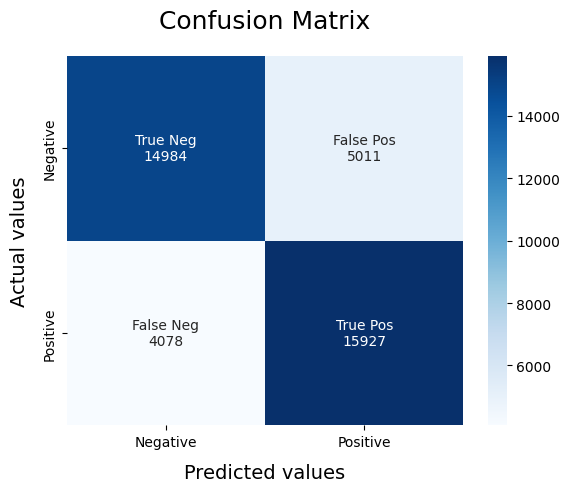

In [35]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Logistic Regression Hyperparameter

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of model on training data : 52.41%
Accuracy of model on testing data : 52.34% 

              precision    recall  f1-score   support

           0       0.53      0.36      0.43     19995
           1       0.52      0.69      0.59     20005

    accuracy                           0.52     40000
   macro avg       0.53      0.52      0.51     40000
weighted avg       0.53      0.52      0.51     40000



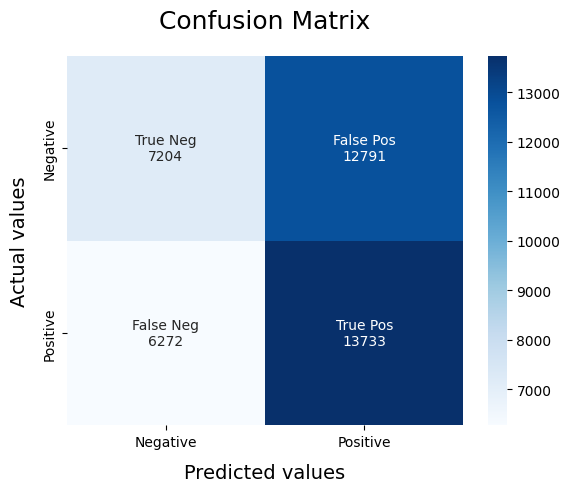

In [89]:
import joblib
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
# Step 1: Define parameter grid for Elastic Net regularization
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports l1 and l2
}


# Initialize Logistic Regression
lg = LogisticRegression(max_iter=500)

# Grid search with 5-fold cross-validation
grid = GridSearchCV(lg, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Best Model
para_lg = grid.best_estimator_


# Print out the best hyperparameters
print(f"Best Parameters: {grid.best_params_}")

# Step 5: Save the model to disk
joblib.dump(para_lg, 'best_lg.joblib')

# Optionally, you can evaluate the best model on the test data
para_lg.fit(X_train, y_train)
model_Evaluate(para_lg)  

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 88.10%
Accuracy of model on testing data : 75.90% 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     19995
           1       0.75      0.78      0.76     20005

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



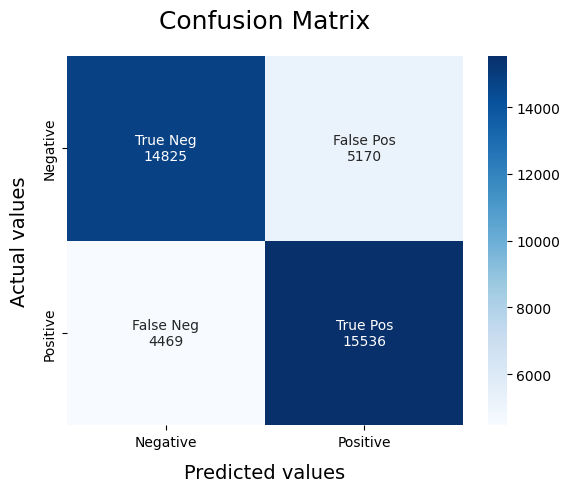

In [36]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

## Random Forest


Accuracy of model on training data : 98.36%
Accuracy of model on testing data : 61.00% 

              precision    recall  f1-score   support

           0       0.60      0.67      0.63     19995
           1       0.63      0.55      0.58     20005

    accuracy                           0.61     40000
   macro avg       0.61      0.61      0.61     40000
weighted avg       0.61      0.61      0.61     40000



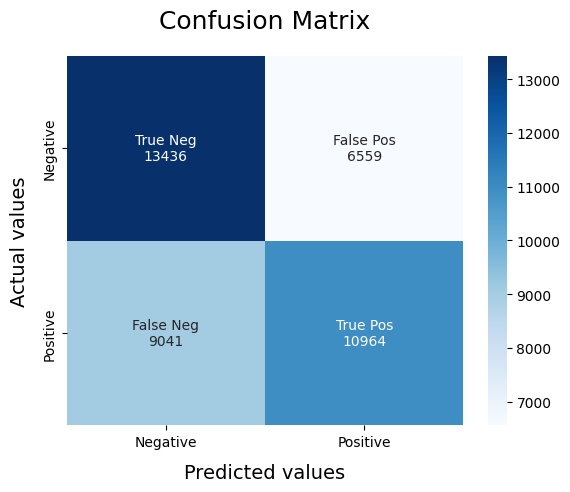

In [77]:
rf0 = RandomForestClassifier()
rf0.fit(X_train, y_train)
model_Evaluate(rf0)

### Random Forest Hyperparameter tunning


Accuracy of model on training data : 76.14%
Accuracy of model on testing data : 71.14% 

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     19995
           1       0.69      0.77      0.73     20005

    accuracy                           0.71     40000
   macro avg       0.71      0.71      0.71     40000
weighted avg       0.71      0.71      0.71     40000



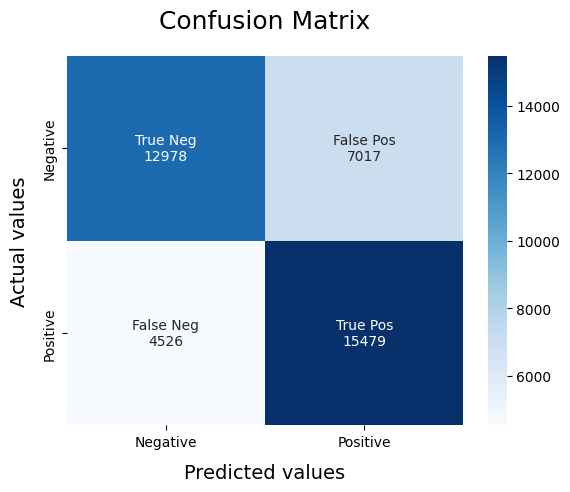

In [37]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes 

Accuracy of model on training data : 83.16%
Accuracy of model on testing data : 76.05% 

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     19995
           1       0.76      0.76      0.76     20005

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



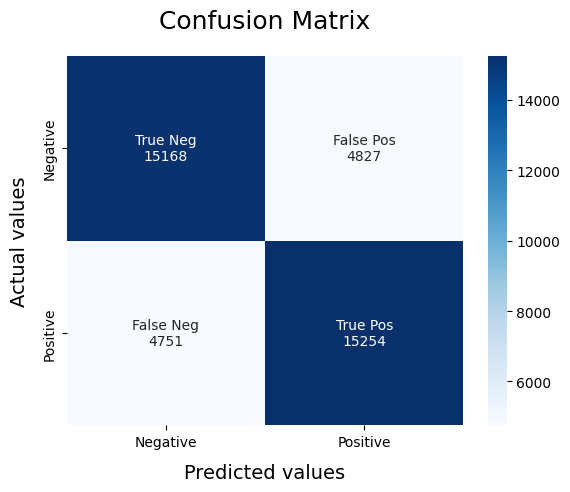

In [38]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

### Naive Bayes  Hyperparameter


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'alpha': 0.5}
Best cross-validation accuracy: 0.52753125
Accuracy of model on training data : 52.75%
Accuracy of model on testing data : 52.85% 

              precision    recall  f1-score   support

           0       0.53      0.44      0.48     19995
           1       0.52      0.62      0.57     20005

    accuracy                           0.53     40000
   macro avg       0.53      0.53      0.52     40000
weighted avg       0.53      0.53      0.52     40000



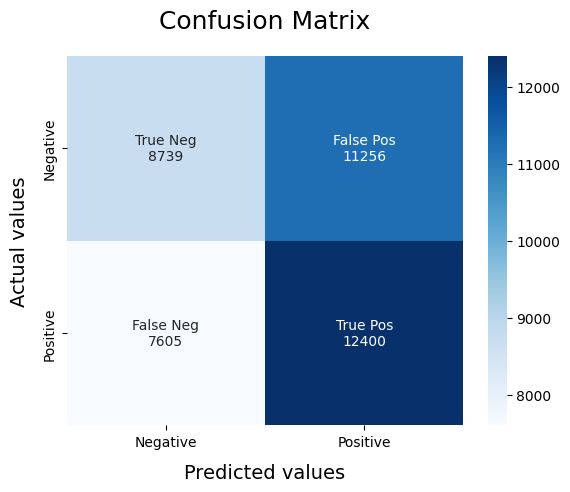

In [80]:
# Define parameter grid
param_grid = {
    'alpha': [0.0, 0.5, 1.0,1.5,2.0]  
}

# Initialize BernoulliNB
nb = BernoulliNB()

# Grid search with 5-fold cross-validation
grid = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Evaluate on test set
best_nb = grid.best_estimator_

best_nb.fit(X_train, y_train)
model_Evaluate(best_nb)

## Neural Network

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import re

In [40]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   56   26   16]
 [   0    0    0 ...  346 2658   11]
 [   0    0    0 ...   16  507  379]
 ...
 [   0    0    0 ...   19  395 1257]
 [   0    0    0 ... 1933  600  595]
 [   0    0    0 ...   43  286    2]]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=41)

### LSTM - architectures I

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model1 = Sequential()
model1.add(layers.Embedding(max_words, 64))
model1.add(layers.LSTM(32,dropout=0.4))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

checkpoint2 = ModelCheckpoint(
    "rnn_model1.keras", 
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,  # saving full model
    save_freq='epoch'
)


early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model1.fit(X_train, y_train, epochs=10,batch_size=128, validation_data=(X_test, y_test), callbacks=[checkpoint2, early_stop])


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7048 - loss: 0.5602
Epoch 1: val_accuracy improved from None to 0.76720, saving model to rnn_model1.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step - accuracy: 0.7451 - loss: 0.5183 - val_accuracy: 0.7672 - val_loss: 0.4887
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7763 - loss: 0.4746
Epoch 2: val_accuracy improved from 0.76720 to 0.77068, saving model to rnn_model1.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.7748 - loss: 0.4753 - val_accuracy: 0.7707 - val_loss: 0.4788
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7842 - loss: 0.4569
Epoch 3: val_accuracy improved from 0.77068 to 0.77223, saving model to rnn_model1.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 104ms/step - accuracy: 0.7811 - loss: 0.4602 - val_accuracy: 0.7722 - val_loss: 0.4743
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7901 - loss: 0.4442
Epoch 4: val_ac

In [71]:
model1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (128, 200, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (128, 32)              │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (128, 8)               │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (128, 1)               │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 998,069 (3.81 MB)

 Trainable params: 332,689 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 665,380 (2.54 MB)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     19995
           1       0.76      0.80      0.78     20005

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



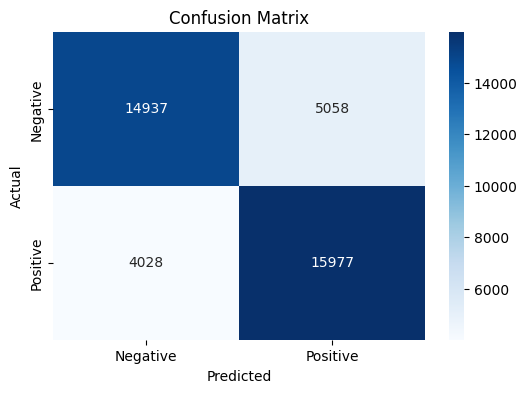

In [ ]:
#  Predict on test data
y_pred_prob = model1.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to 0/1

#  Confusion matrix & classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### LSTM - architectures II

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.4))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
checkpoint2 = ModelCheckpoint(
    "rnn_model.keras", 
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,  # saving full model
    save_freq='epoch'
)


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model2.fit(X_train, y_train, epochs=8,batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint2, early_stop])


Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7178 - loss: 0.5417
Epoch 1: val_accuracy improved from None to 0.76800, saving model to rnn_model.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 178s 70ms/step - accuracy: 0.7507 - loss: 0.5053 - val_accuracy: 0.7680 - val_loss: 0.4807
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7803 - loss: 0.4595
Epoch 2: val_accuracy improved from 0.76800 to 0.77478, saving model to rnn_model.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 189s 75ms/step - accuracy: 0.7795 - loss: 0.4636 - val_accuracy: 0.7748 - val_loss: 0.4705
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7905 - loss: 0.4437
Epoch 3: val_accuracy did not improve from 0.77478
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 177s 71ms/step - accuracy: 0.7885 - loss: 0.4463 - val_accuracy: 0.7735 - val_loss: 0.4711
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8013 - loss: 0.4252
Epoch 4: val_accuracy improved from 0.77478 to 0.77520, sa

In [62]:
model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 200, 128)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (64, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 16)               │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 8)                │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 1)                │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,071,781 (7.90 MB)

 Trainable params: 690,593 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,381,188 (5.27 MB)

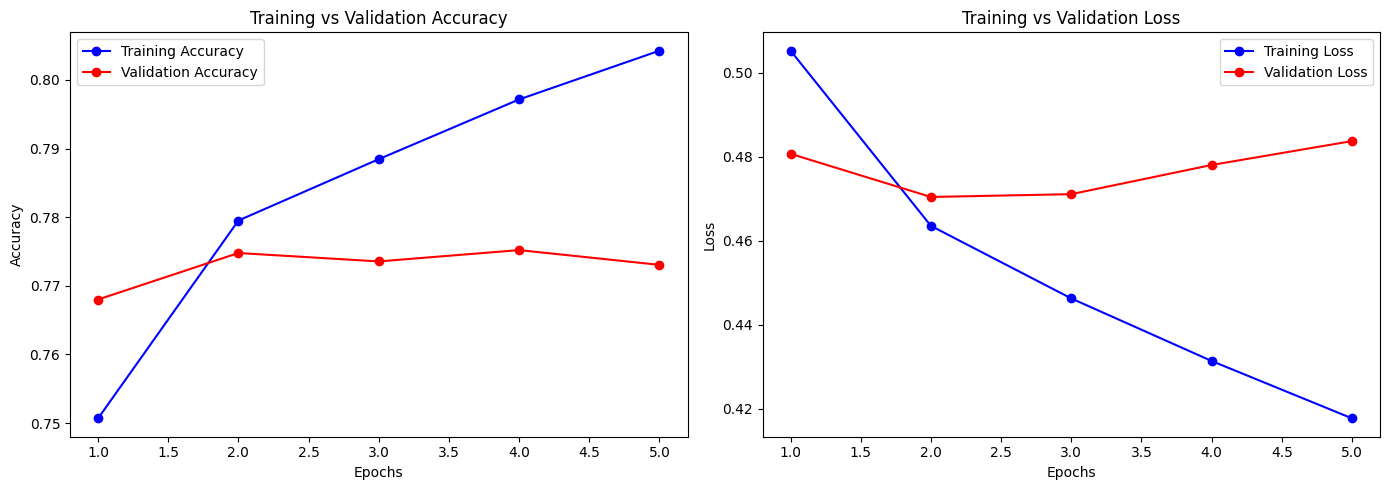

In [43]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     19995
           1       0.78      0.77      0.77     20005

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



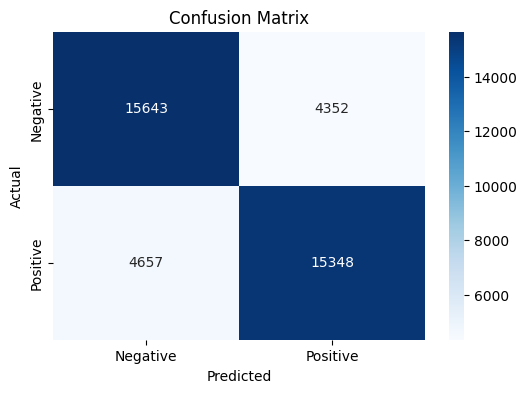

In [ ]:
# Predict on test data
y_pred_prob = model2.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to 0/1

#  Confusion matrix & classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# : Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import keras
model = keras.models.load_model('rnn_model.keras')
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.2:
  print('Positive')
else:
  print('Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Negative


In [59]:
import keras
model = keras.models.load_model('rnn_model.keras')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.2:
  print('Positive')
else:
  print('Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Positive


In [56]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.2:
  print('Positive')
else:
  print('Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Negative


# Model Saving, Loading and Prediction <a id="13"></a>

In [48]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [49]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [50]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [51]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())


                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
